# Prediction of time series with a seasonal component

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import ExponentialSmoothing

In [3]:
# Load the data
co2 = pd.read_csv('./CO2_data.csv', index_col=0)
co2.index = pd.to_datetime(co2.index)
co2

,CO2
1995-01-31,315.42
1995-02-28,316.31
1995-03-31,316.50
1995-04-30,317.56
1995-05-31,318.13
...,...
2019-08-31,342.21
2019-09-30,339.69
2019-10-31,339.82
2019-11-30,340.98


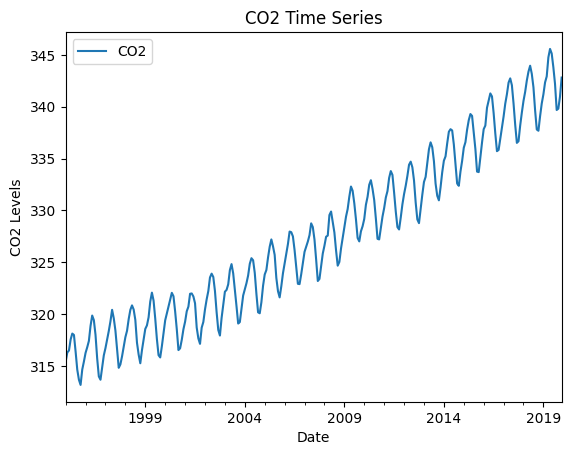

In [5]:
# Plot the time series
co2.plot(title='CO2 Time Series')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.show()
#here there is a trend and the seasonal component seems to follow an additive pattern(modele)

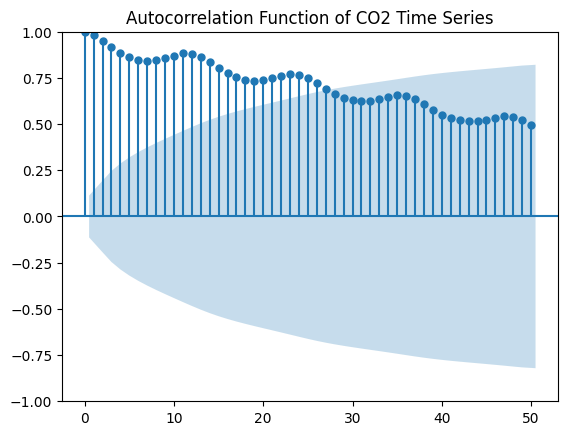

In [6]:
plot_acf(co2, lags=50)
plt.title('Autocorrelation Function of CO2 Time Series')
plt.show()

In [99]:
# We will now apply the Triple Exponential Smoothing algorithm to the training data (additive model first)
# As you can see below, we need to indicate the length of the period in 'seasonal_periods', and 
# we specify sesaonal = 'add' for an additive model (trend will always be 'add' for us)
tes_model = ExponentialSmoothing(co2_train, initialization_method='estimated',seasonal_periods=12, trend = 'add', seasonal = 'add').fit()
tes_model.summary()

Dep. Variable:,CO2,No. Observations:,252
Model:,ExponentialSmoothing,SSE,17.616
Optimized:,True,AIC,-638.477
Trend:,Additive,BIC,-582.007
Seasonal:,Additive,AICC,-635.542
Seasonal Periods:,12,Date:,"Sun, 14 Feb 2021"
Box-Cox:,False,Time:,09:43:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6505998,alpha,True
smoothing_trend,0.000000,beta,True


In [100]:
# To see the evolution of the parameter a throughout the TES algorithm you can ask:
tes_model.level

1995-01-31    315.512802
1995-02-28    315.717182
1995-03-31    315.463053
1995-04-30    315.361936
1995-05-31    315.377175
                 ...    
2015-08-31    336.992055
2015-09-30    336.768941
2015-10-31    336.843794
2015-11-30    337.064266
2015-12-31    337.403779
Length: 252, dtype: float64

In [101]:
# To see the evolution of the parameter b throughout the TES algorithm you can ask:
tes_model.trend

1995-01-31    0.087251
1995-02-28    0.087251
1995-03-31    0.087251
1995-04-30    0.087251
1995-05-31    0.087251
                ...   
2015-08-31    0.087251
2015-09-30    0.087251
2015-10-31    0.087251
2015-11-30    0.087251
2015-12-31    0.087251
Length: 252, dtype: float64

In [102]:
# To see the evolution of the seasonal coefficients throughout the TES algorithm you can ask:
tes_model.season

1995-01-31   -0.097597
1995-02-28    0.529915
1995-03-31    1.220283
1995-04-30    2.299226
1995-05-31    2.791498
                ...   
2015-08-31   -1.146918
2015-09-30   -2.852262
2015-10-31   -3.137135
2015-11-30   -2.015812
2015-12-31   -0.979255
Length: 252, dtype: float64

In [105]:
# These predictions can be obtained by the following command : 
tes_model.forecast(2)

2016-01-31    337.393434
2016-02-29    338.108197
Freq: M, dtype: float64

In [109]:
# We will now try a model with a multiplicative seasonal composant. 
# For this, you need to specify seasonal = 'mul' in the call of the Exponenatial smoothing function : 
tes_model = ExponentialSmoothing(co2_train, initialization_method='estimated',seasonal_periods=12, trend = 'add', seasonal = 'mul').fit()
tes_model.summary()

Dep. Variable:,CO2,No. Observations:,252
Model:,ExponentialSmoothing,SSE,17.300
Optimized:,True,AIC,-643.040
Trend:,Additive,BIC,-586.569
Seasonal:,Multiplicative,AICC,-640.104
Seasonal Periods:,12,Date:,"Sun, 14 Feb 2021"
Box-Cox:,False,Time:,09:46:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6309936,alpha,True
smoothing_trend,1.8959e-14,beta,True


In [111]:
# These predictions can be obtained by the command:
tes_model.forecast(2)

2016-01-31    337.436496
2016-02-29    338.176124
Freq: M, dtype: float64

## Classical AutoRegressive models (no trend no season)

## AutoRegressive models with trend

## AutoRegressive models with seasonal component

In [119]:
# We will now apply a seasonal AR model of order 1 without trend (to start):
# For this, you need to specify seasonal = True and to indicate the period of the seasonal component (12 here)
ARS = AutoReg(co2_train, lags = 1, trend = 'c',seasonal=True, period = 12).fit()
ARS.summary()

/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  252
Model:               Seas. AutoReg(1)   Log Likelihood                 -35.315
Method:               Conditional MLE   S.D. of innovations              0.279
Date:                Sun, 14 Feb 2021   AIC                             -2.445
Time:                        09:55:39   BIC                             -2.248
Sample:                    02-28-1995   HQIC                            -2.366
                         - 12-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.1829      0.910      0.201      0.841      -1.601       1.967
seasonal.1     -0.2615      0.087     -3.005      0.003      -0.432      -0.091
seasonal.2     -0.2004      0.087     -2.301      0.021      -0.371      -0.030
seasonal.3      0.1863      0.087      2.136      0.033       0.015       0.357
seasonal.4     -0.4033      0.087     -4.610      0.000      -0.575      -0.232
seasonal.5     -1.4575      0.088    -16.627      0.000      -1.629      -1.286
seasonal.6     -2.2721      0.088    -25.964      0.000      -2.444      -2.101
seasonal.7     -2.8942      0.087    -33.189      0.000      -3.065      -2.723
seasonal.8     -2.5933      0.087    -29.800      0.000      -2.764      -2.423
seasonal.9     -1.1689      0.087    -13.415      0.000      -1.340      -0.998
seasonal.10     0.2378      0.087      2.728      0.006       0.067       0.409
seasonal.11     0.1501      0.087      1.724      0.085      -0.021       0.321
CO2.L1          1.0024      0.003    357.539      0.000       0.997       1.008
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9976           +0.0000j            0.9976            0.0000
-----------------------------------------------------------------------------
"""

In [130]:
#These values can be obtained by the following command:
ARS.forecast(2)

/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


2016-01-31    337.565977
2016-02-29    338.312892
Freq: M, dtype: float64